In [ ]:
pip install tensorflow

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import yfinance as yf
import pandas_datareader as pdr
from yahoofinancials import YahooFinancials 
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
import math
import warnings
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")
%matplotlib inline
warnings.filterwarnings(action='ignore', message='All-NaN slice encountered')

2022-12-08 11:40:51.493660: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
#tickers = ['LLOY.L','RR.L','NWG.L','BP.L','VOD.L']
ticker = ['LLOY.L']
Lloyds_df = pdr.DataReader(ticker, data_source='yahoo', start='2020-01-01', end='2021-01-01')

In [3]:
Lloyds_df.head()

Attributes,Adj Close,Close,High,Low,Open,Volume
Symbols,LLOY.L,LLOY.L,LLOY.L,LLOY.L,LLOY.L,LLOY.L
Date,,,,,,
2020-01-02,54.644222,63.709999,63.840000,63.240002,63.750000,157613349.0
2020-01-03,54.078140,63.049999,63.799999,62.450001,63.799999,198856652.0
2020-01-06,54.249680,63.250000,63.324001,62.071999,63.200001,136196286.0
2020-01-07,54.129601,63.110001,63.689999,62.889999,63.110001,107254282.0
2020-01-08,53.855137,62.790001,62.869999,62.009998,62.580002,157679455.0


In [4]:
#Lloyds_df.to_csv("Lloyds_new.csv")

In [5]:
Lloyds_df

Attributes,Adj Close,Close,High,Low,Open,Volume
Symbols,LLOY.L,LLOY.L,LLOY.L,LLOY.L,LLOY.L,LLOY.L
Date,,,,,,
2020-01-02,54.644222,63.709999,63.840000,63.240002,63.750000,157613349.0
2020-01-03,54.078140,63.049999,63.799999,62.450001,63.799999,198856652.0
2020-01-06,54.249680,63.250000,63.324001,62.071999,63.200001,136196286.0
2020-01-07,54.129601,63.110001,63.689999,62.889999,63.110001,107254282.0
2020-01-08,53.855137,62.790001,62.869999,62.009998,62.580002,157679455.0
...,...,...,...,...,...,...
2020-12-23,34.447948,37.125000,37.700001,34.724998,34.724998,403869991.0
2020-12-24,35.821224,38.605000,40.049999,38.424999,38.860001,269729556.0


In [6]:
Lloyds_df.describe()

Attributes,Adj Close,Close,High,Low,Open,Volume
Symbols,LLOY.L,LLOY.L,LLOY.L,LLOY.L,LLOY.L,LLOY.L
count,254.000000,254.000000,254.000000,254.000000,254.000000,2.540000e+02
mean,32.203098,35.758524,36.701236,35.035492,35.796476,2.595902e+08
std,8.475709,10.634699,10.833484,10.667319,10.772431,1.236188e+08
min,22.250822,23.980000,24.740000,23.584999,24.040001,7.276205e+07
25%,26.309184,28.430001,29.105000,28.030001,28.455000,1.668691e+08
50%,28.685857,31.332500,32.084499,30.577499,31.205000,2.325813e+08
75%,34.391114,37.198750,38.142501,36.225249,37.017501,3.335475e+08
max,54.644222,63.709999,63.840000,63.240002,63.799999,7.147421e+08


In [7]:
Lloyds_df

Attributes,Adj Close,Close,High,Low,Open,Volume
Symbols,LLOY.L,LLOY.L,LLOY.L,LLOY.L,LLOY.L,LLOY.L
Date,,,,,,
2020-01-02,54.644222,63.709999,63.840000,63.240002,63.750000,157613349.0
2020-01-03,54.078140,63.049999,63.799999,62.450001,63.799999,198856652.0
2020-01-06,54.249680,63.250000,63.324001,62.071999,63.200001,136196286.0
2020-01-07,54.129601,63.110001,63.689999,62.889999,63.110001,107254282.0
2020-01-08,53.855137,62.790001,62.869999,62.009998,62.580002,157679455.0
...,...,...,...,...,...,...
2020-12-23,34.447948,37.125000,37.700001,34.724998,34.724998,403869991.0
2020-12-24,35.821224,38.605000,40.049999,38.424999,38.860001,269729556.0


In [8]:
Lloyds_df.isnull().sum()

Attributes  Symbols
Adj Close   LLOY.L     0
Close       LLOY.L     0
High        LLOY.L     0
Low         LLOY.L     0
Open        LLOY.L     0
Volume      LLOY.L     0
dtype: int64

In [9]:
Lloyds_df.isnull().values.any()

False

In [10]:
Lloyds_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 254 entries, 2020-01-02 to 2020-12-31
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   (Adj Close, LLOY.L)  254 non-null    float64
 1   (Close, LLOY.L)      254 non-null    float64
 2   (High, LLOY.L)       254 non-null    float64
 3   (Low, LLOY.L)        254 non-null    float64
 4   (Open, LLOY.L)       254 non-null    float64
 5   (Volume, LLOY.L)     254 non-null    float64
dtypes: float64(6)
memory usage: 13.9 KB


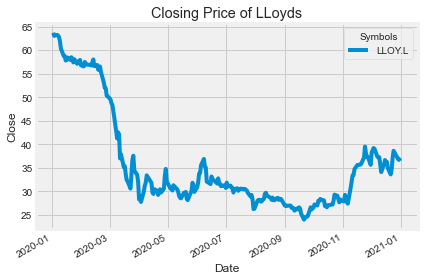

In [11]:

Lloyds_df['Close'].plot()
plt.ylabel('Close')
plt.xlabel('Date')
plt.title(f"Closing Price of LLoyds")

plt.tight_layout()

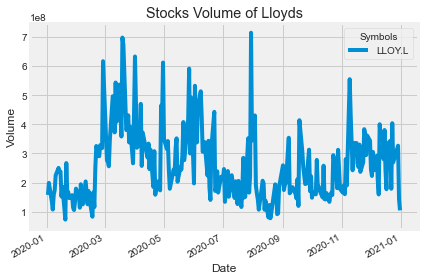

In [12]:

Lloyds_df['Volume'].plot()
plt.ylabel('Volume')
plt.xlabel('Date')
plt.title(f"Stocks Volume of Lloyds")
    
plt.tight_layout()

In [13]:
lloyds_data = Lloyds_df['Close']

In [14]:
lloyds_data

Symbols,LLOY.L
Date,
2020-01-02,63.709999
2020-01-03,63.049999
2020-01-06,63.250000
2020-01-07,63.110001
2020-01-08,62.790001
...,...
2020-12-23,37.125000
2020-12-24,38.605000
2020-12-29,36.755001


In [25]:
Lloyds_dataset = lloyds_data.values

In [26]:
Lloyds_dataset

array([[63.70999908],
       [63.04999924],
       [63.25      ],
       [63.11000061],
       [62.79000092],
       [61.84999847],
       [60.33000183],
       [58.74000168],
       [58.75      ],
       [57.81000137],
       [57.90000153],
       [58.45000076],
       [57.90000153],
       [58.5       ],
       [58.09000015],
       [57.40000153],
       [58.09000015],
       [57.11000061],
       [57.63999939],
       [57.5       ],
       [57.93000031],
       [56.79000092],
       [56.54999924],
       [57.5       ],
       [57.13999939],
       [56.95000076],
       [56.91999817],
       [56.88000107],
       [56.72999954],
       [57.43999863],
       [58.02999878],
       [56.61000061],
       [56.86999893],
       [55.88000107],
       [55.77999878],
       [56.54999924],
       [55.34999847],
       [53.11000061],
       [52.00999832],
       [51.90999985],
       [50.34999847],
       [50.20000076],
       [49.54000092],
       [48.67499924],
       [48.36500168],
       [47

In [27]:
training_data_length_of_Lloyds = math.ceil(len(Lloyds_dataset)*0.8)

In [28]:
Lloyds_scaler = MinMaxScaler(feature_range=(0,1))
Lloyds_scaled_data = Lloyds_scaler.fit_transform(Lloyds_dataset)

In [29]:
train_data = Lloyds_scaled_data[:training_data_length_of_Lloyds]
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=60:
    print(x_train)
    print(y_train)

[array([1.        , 0.98338787, 0.98842187, 0.9848981 , 0.97684374,
       0.95318398, 0.91492582, 0.87490568, 0.87515733, 0.85149766,
       0.85376296, 0.86760638, 0.85376296, 0.86886486, 0.85854521,
       0.84117801, 0.85854521, 0.83387872, 0.84721873, 0.84369496,
       0.85451803, 0.82582436, 0.81978354, 0.84369496, 0.83463378,
       0.82985154, 0.82909638, 0.82808965, 0.82431413, 0.84218473,
       0.85703498, 0.82129377, 0.8278379 , 0.80291976, 0.80040271,
       0.81978354, 0.78957964, 0.73319913, 0.70551218, 0.70299523,
       0.66373016, 0.65995473, 0.6433426 , 0.6215706 , 0.61376799,
       0.57941104, 0.54618679, 0.4343066 , 0.46702745, 0.45658192,
       0.3275862 , 0.35011326, 0.28014098, 0.28542664, 0.24301533,
       0.2113013 , 0.20437954, 0.16586963, 0.24326708, 0.32091619])]
[0.34180724861620004]


In [30]:
print(Lloyds_scaled_data)

[[1.        ]
 [0.98338787]
 [0.98842187]
 [0.9848981 ]
 [0.97684374]
 [0.95318398]
 [0.91492582]
 [0.87490568]
 [0.87515733]
 [0.85149766]
 [0.85376296]
 [0.86760638]
 [0.85376296]
 [0.86886486]
 [0.85854521]
 [0.84117801]
 [0.85854521]
 [0.83387872]
 [0.84721873]
 [0.84369496]
 [0.85451803]
 [0.82582436]
 [0.81978354]
 [0.84369496]
 [0.83463378]
 [0.82985154]
 [0.82909638]
 [0.82808965]
 [0.82431413]
 [0.84218473]
 [0.85703498]
 [0.82129377]
 [0.8278379 ]
 [0.80291976]
 [0.80040271]
 [0.81978354]
 [0.78957964]
 [0.73319913]
 [0.70551218]
 [0.70299523]
 [0.66373016]
 [0.65995473]
 [0.6433426 ]
 [0.6215706 ]
 [0.61376799]
 [0.57941104]
 [0.54618679]
 [0.4343066 ]
 [0.46702745]
 [0.45658192]
 [0.3275862 ]
 [0.35011326]
 [0.28014098]
 [0.28542664]
 [0.24301533]
 [0.2113013 ]
 [0.20437954]
 [0.16586963]
 [0.24326708]
 [0.32091619]
 [0.34180725]
 [0.2621445 ]
 [0.23961743]
 [0.20186259]
 [0.10797888]
 [0.12396177]
 [0.09426129]
 [0.15001261]
 [0.18223005]
 [0.19833882]
 [0.23684873]
 [0.19

In [31]:
x_train , y_train = np.array(x_train),np.array(y_train)
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1) )
print(x_train.shape)
print(y_train.shape)

(144, 60, 1)
(144,)


In [32]:
model = Sequential()
model.add(LSTM(50,return_sequences = True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer='adam', loss = 'mean_squared_error')

In [33]:
model.fit(x_train, y_train, batch_size = 1, epochs = 100)

Epoch 1/100
144/144 [==============================] - 5s 15ms/step - loss: 0.0035
Epoch 2/100
144/144 [==============================] - 2s 14ms/step - loss: 0.0024
Epoch 3/100
144/144 [==============================] - 2s 15ms/step - loss: 0.0022
Epoch 4/100
144/144 [==============================] - 2s 15ms/step - loss: 0.0019
Epoch 5/100
144/144 [==============================] - 2s 15ms/step - loss: 0.0017
Epoch 6/100
144/144 [==============================] - 2s 15ms/step - loss: 0.0015
Epoch 7/100
144/144 [==============================] - 2s 15ms/step - loss: 0.0015
Epoch 8/100
144/144 [==============================] - 3s 22ms/step - loss: 0.0014
Epoch 9/100
144/144 [==============================] - 3s 21ms/step - loss: 0.0014
Epoch 10/100
144/144 [==============================] - 3s 20ms/step - loss: 0.0013
Epoch 11/100
144/144 [==============================] - 3s 19ms/step - loss: 9.1874e-04
Epoch 12/100
144/144 [==============================] - 2s 17ms/step - loss: 9.25

144/144 [==============================] - 2s 15ms/step - loss: 6.1637e-04
Epoch 95/100
144/144 [==============================] - 2s 15ms/step - loss: 6.5738e-04
Epoch 96/100
144/144 [==============================] - 2s 15ms/step - loss: 6.2755e-04
Epoch 97/100
144/144 [==============================] - 2s 15ms/step - loss: 6.2197e-04
Epoch 98/100
144/144 [==============================] - 2s 14ms/step - loss: 6.5577e-04
Epoch 99/100
144/144 [==============================] - 2s 15ms/step - loss: 6.8089e-04
Epoch 100/100
144/144 [==============================] - 2s 15ms/step - loss: 6.9008e-04


In [34]:
test_data = Lloyds_scaled_data[training_data_length_of_Lloyds - 60:,:]
x_test = []
y_test = Lloyds_dataset[training_data_length_of_Lloyds:,:]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])
  
x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [36]:
predictions = model.predict(x_test)
predictions = Lloyds_scaler.inverse_transform(predictions)

2/2 [==============================] - 0s 11ms/step


In [39]:
rmse = np.sqrt(np.mean(predictions-y_test)**2)

/var/folders/rl/dl7j1mvj1c55v_5cclyl5d0m0000gn/T/ipykernel_42896/4011440000.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['predictions'] = predictions


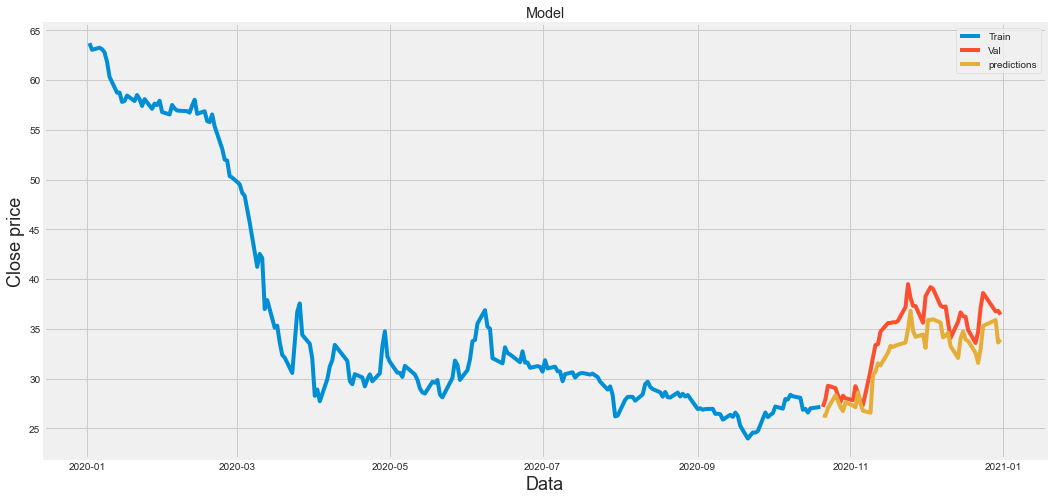

In [59]:
train = lloyds_data[:training_data_length_of_Lloyds]
valid = lloyds_data[training_data_length_of_Lloyds:]
valid['predictions'] = predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Data',fontsize = 18)
plt.ylabel('Close price',fontsize = 18)
plt.plot(train['LLOY.L'])
plt.plot(valid[['LLOY.L','predictions']])
plt.legend(['Train','Val','predictions'])
plt.show()

In [54]:
print(train)

Symbols        LLOY.L
Date                 
2020-01-02  63.709999
2020-01-03  63.049999
2020-01-06  63.250000
2020-01-07  63.110001
2020-01-08  62.790001
...               ...
2020-10-14  26.959999
2020-10-15  26.590000
2020-10-16  27.010000
2020-10-19  27.120001
2020-10-20  27.174999

[204 rows x 1 columns]


In [61]:
print(valid)

Symbols        LLOY.L  predictions
Date                              
2020-10-21  27.165001    26.295210
2020-10-22  27.915001    26.247393
2020-10-23  29.285000    27.034668
2020-10-26  29.049999    28.324532
2020-10-27  28.325001    27.775362
2020-10-28  27.650000    27.175728
2020-10-29  28.280001    26.736315
2020-10-30  28.025000    27.598370
2020-11-02  27.830000    27.300056
2020-11-03  29.245001    27.114834
2020-11-04  28.520000    28.620745
2020-11-05  27.709999    27.514629
2020-11-06  27.365000    26.769604
2020-11-09  30.780001    26.572716
2020-11-10  32.134998    30.385410
2020-11-11  33.380001    30.682739
2020-11-12  33.470001    31.537846
2020-11-13  34.720001    31.330767
2020-11-16  35.590000    32.609024
2020-11-17  35.595001    33.290073
2020-11-18  35.665001    33.177483
2020-11-19  35.654999    33.317764
2020-11-20  35.814999    33.401932
2020-11-23  37.200001    33.627052
2020-11-24  39.500000    34.953430
2020-11-25  38.130001    36.810780
2020-11-26  37.32000